# Startup Classification Logistic and K-Nearest Neighbors Regression

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("startup_data.csv")

In [3]:
df

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private


In [7]:
df.shape

(500, 12)

In [9]:
df.sample(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
351,Startup_352,FinTech,3,195.63,1210.99,91.08,3680,7.49,1,1994,Europe,Private
187,Startup_188,EdTech,4,14.56,102.60,35.73,192,2.00,0,2012,Australia,Private
322,Startup_323,Cybersecurity,5,96.56,545.53,73.05,3601,0.45,0,1993,Australia,Private
379,Startup_380,EdTech,1,264.82,1515.72,45.10,3121,8.86,0,2018,Asia,Private
457,Startup_458,AI,3,71.12,443.22,40.00,1280,4.11,0,2018,Europe,Private


In [11]:
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding Rounds,500.0,2.95800,1.440968,1.00,2.0000,3.000,4.0000,5.00
Funding Amount (M USD),500.0,152.65676,86.683711,0.57,79.2125,156.005,226.4500,299.81
Valuation (M USD),500.0,1371.80918,978.226579,2.43,557.0275,1222.580,2052.0850,4357.49
Revenue (M USD),500.0,49.32174,29.267605,0.12,22.8025,48.800,74.9650,99.71
Employees,500.0,2532.09200,1385.434921,12.00,1382.7500,2496.500,3708.7500,4984.00
Market Share (%),500.0,5.09294,2.807646,0.10,2.7600,5.135,7.5525,10.00
Profitable,500.0,0.43200,0.495851,0.00,0.0000,0.000,1.0000,1.00
Year Founded,500.0,2006.04400,9.347128,1990.00,1998.0000,2006.000,2014.0000,2022.00


In [15]:
df.nunique()

Startup Name              500
Industry                    8
Funding Rounds              5
Funding Amount (M USD)    494
Valuation (M USD)         500
Revenue (M USD)           490
Employees                 478
Market Share (%)          384
Profitable                  2
Year Founded               33
Region                      5
Exit Status                 3
dtype: int64

In [17]:
df.isnull().sum()

Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.dtypes

Startup Name               object
Industry                   object
Funding Rounds              int64
Funding Amount (M USD)    float64
Valuation (M USD)         float64
Revenue (M USD)           float64
Employees                   int64
Market Share (%)          float64
Profitable                  int64
Year Founded                int64
Region                     object
Exit Status                object
dtype: object

In [23]:
df.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Funding Amount (M USD)',
       'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)',
       'Profitable', 'Year Founded', 'Region', 'Exit Status'],
      dtype='object')

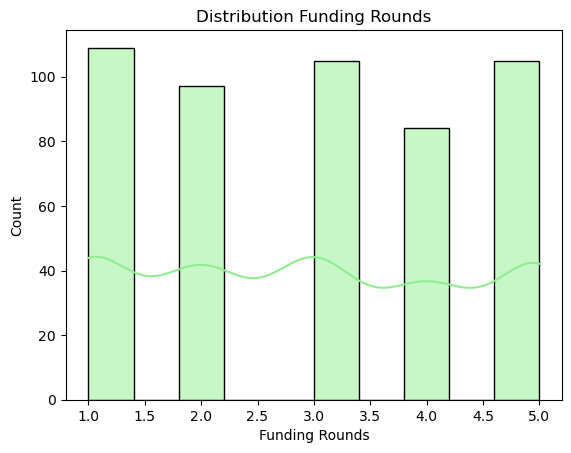

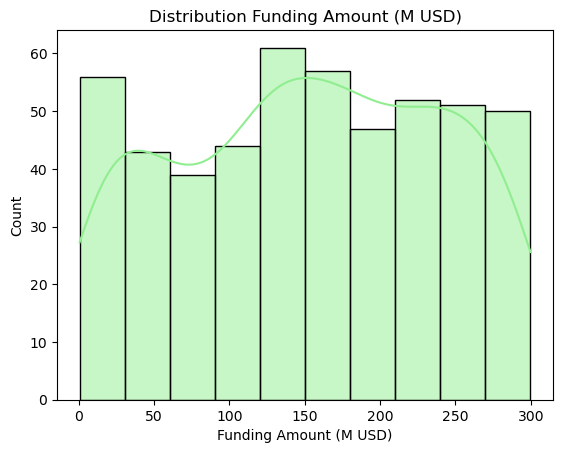

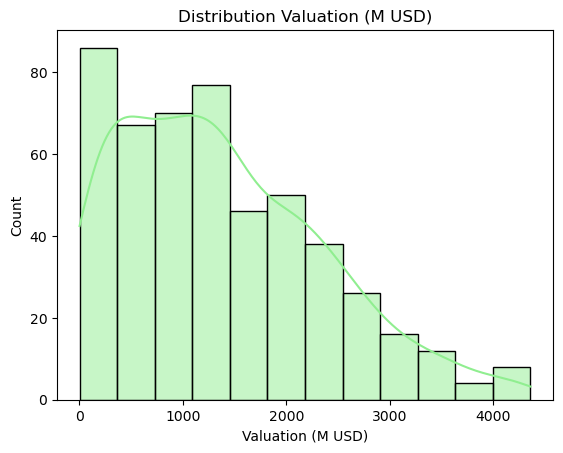

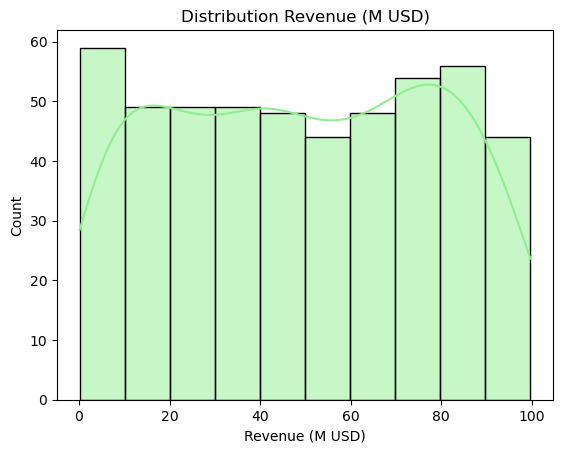

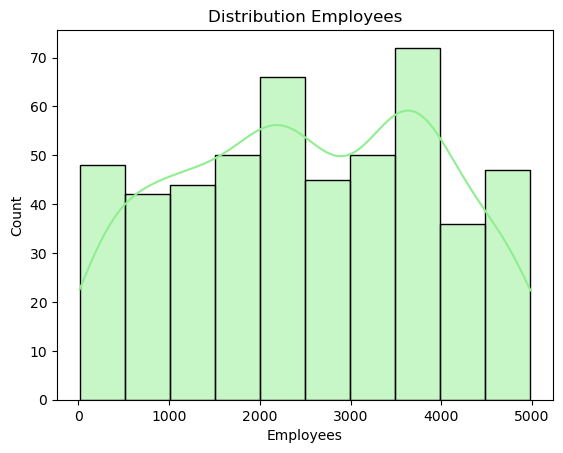

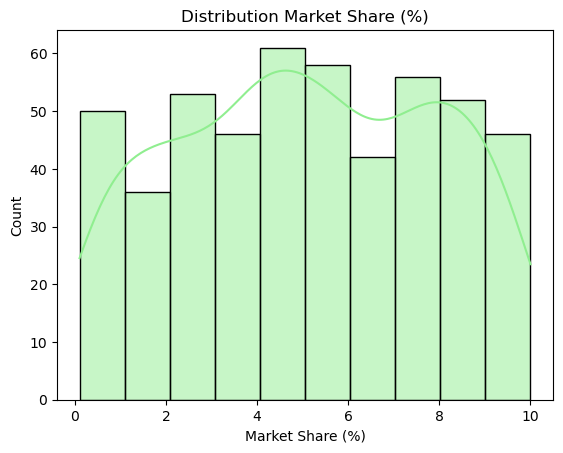

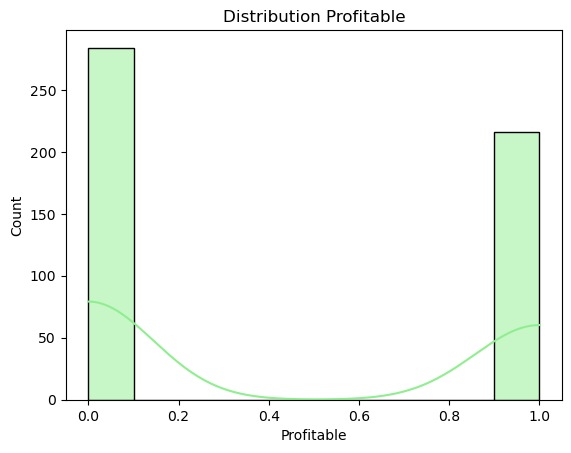

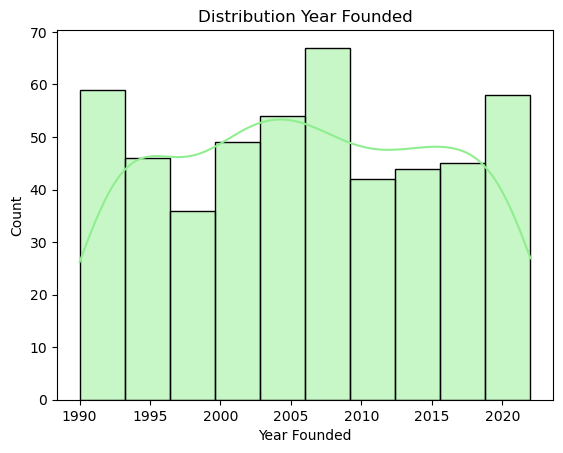

In [25]:
#Univarient graph
col = ["Funding Rounds","Funding Amount (M USD)","Valuation (M USD)","Revenue (M USD)","Employees","Market Share (%)","Profitable","Year Founded"]
for i in col:
    sns.histplot(df[i], kde=True, color="Lightgreen")
    plt.title(f"Distribution {i}")
    plt.show()

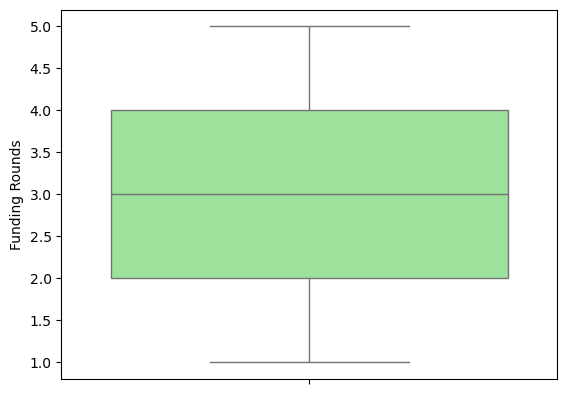

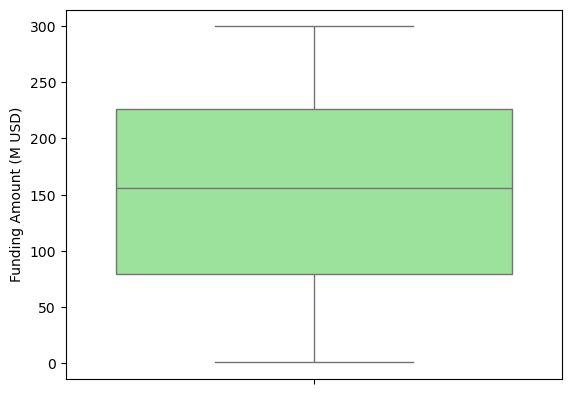

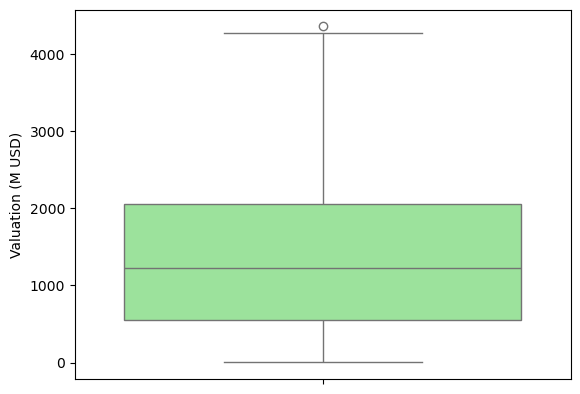

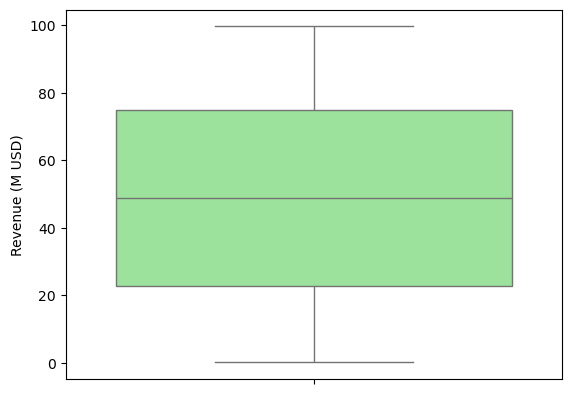

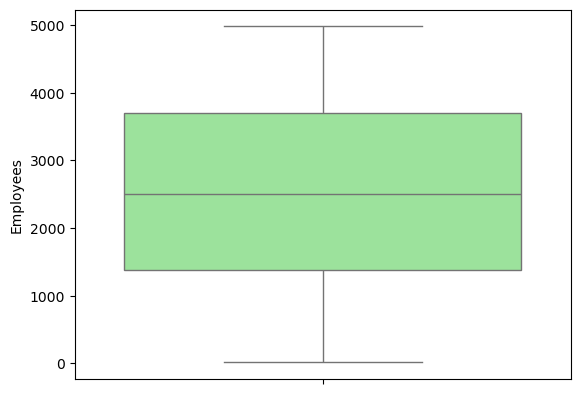

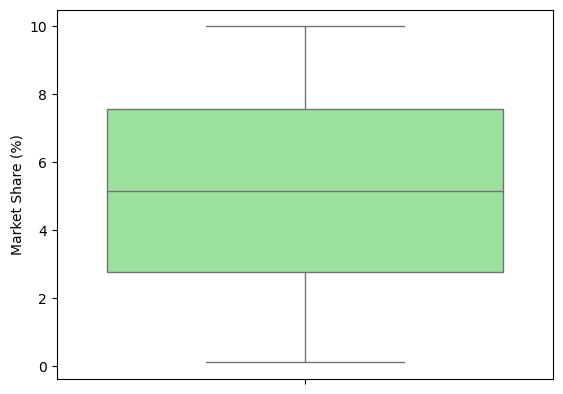

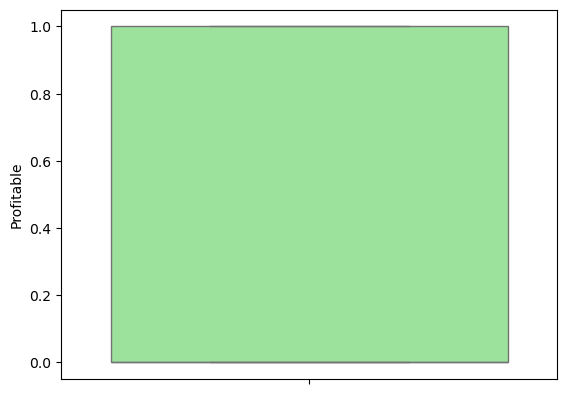

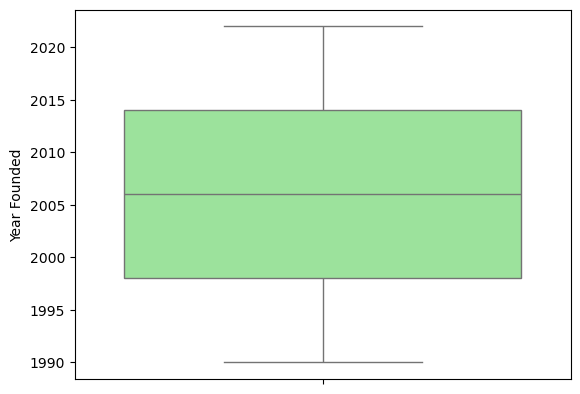

In [27]:
col = ["Funding Rounds","Funding Amount (M USD)","Valuation (M USD)","Revenue (M USD)","Employees","Market Share (%)","Profitable","Year Founded"]
for i in col:
    sns.boxplot(df[i], color="lightgreen")
    plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\3042877809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Exit Status"], palette="BuGn")


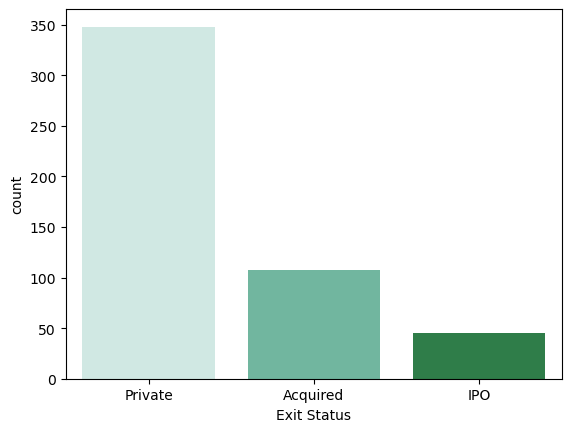

In [29]:
sns.countplot(x=df["Exit Status"], palette="BuGn")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\3111461736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Industry"], palette="BuGn")


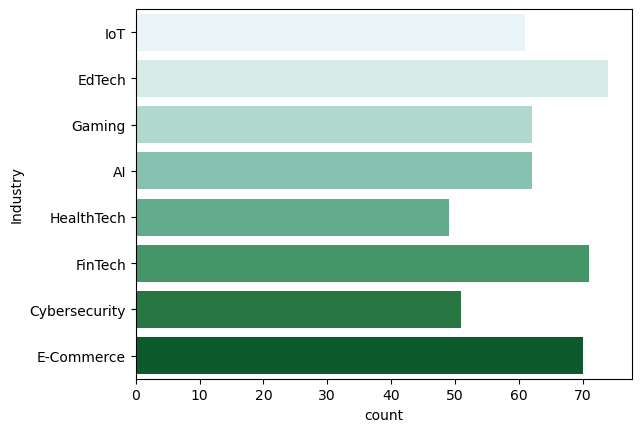

<Figure size 1500x700 with 0 Axes>

In [31]:
sns.countplot(df["Industry"], palette="BuGn")
plt.figure(figsize=(15,7))
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\841146793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(a, palette="GnBu")


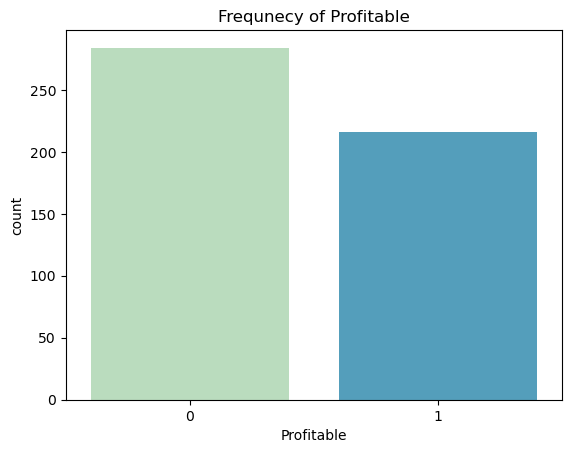

In [33]:
#Bivarient
a = df["Profitable"].value_counts()
sns.barplot(a, palette="GnBu")
plt.title("Frequnecy of Profitable")
plt.show()

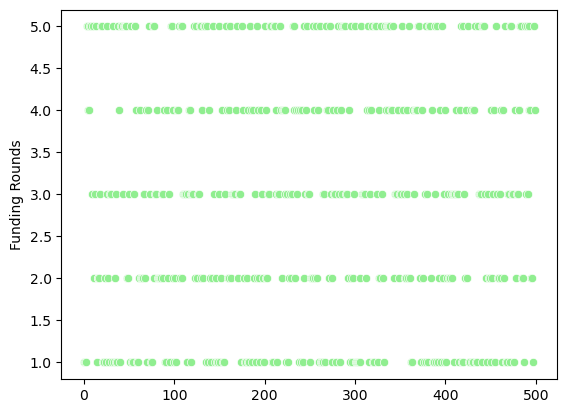

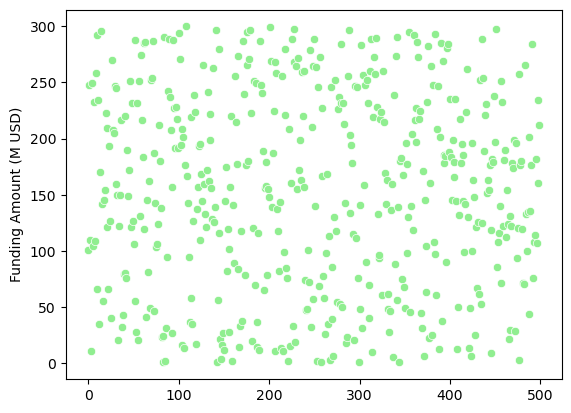

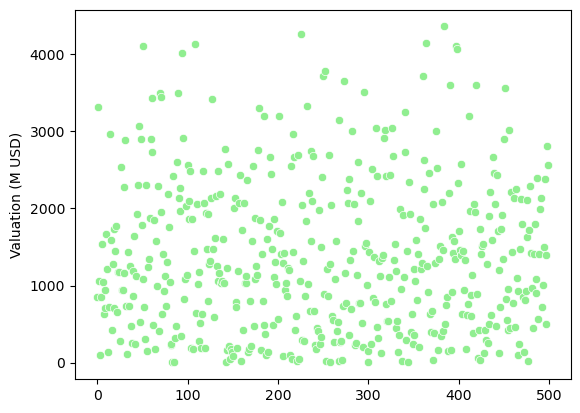

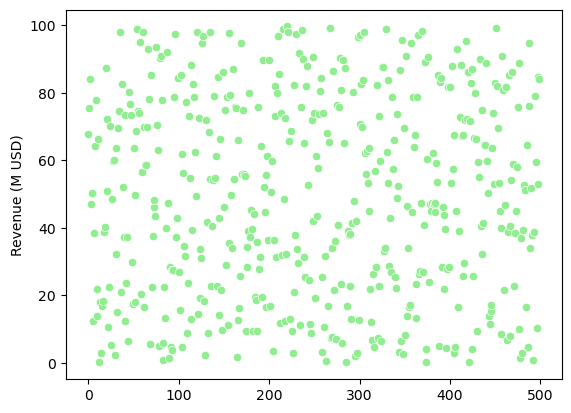

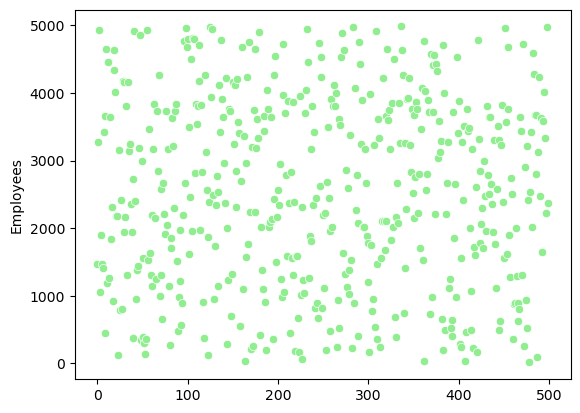

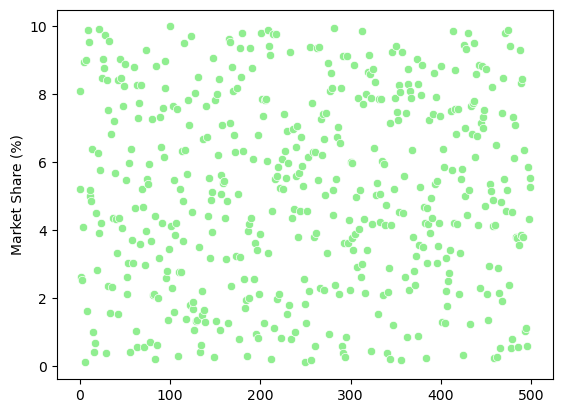

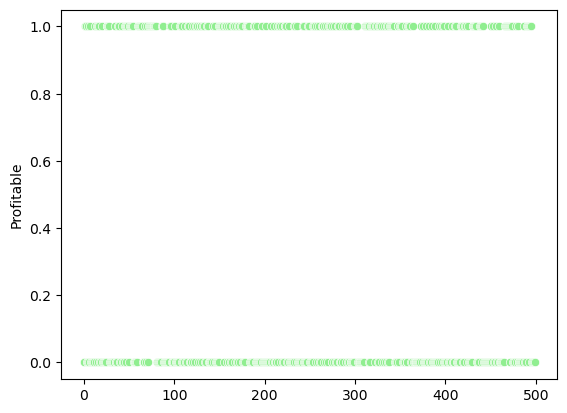

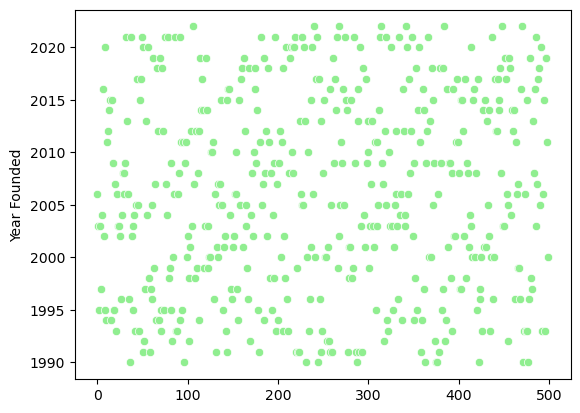

In [35]:
col = ["Funding Rounds","Funding Amount (M USD)","Valuation (M USD)","Revenue (M USD)","Employees","Market Share (%)","Profitable","Year Founded"]
for i in col:
    sns.scatterplot(df[i], color="lightgreen")
    plt.show()

In [37]:
#How many PRofitable or Not
df.groupby(df["Profitable"]).count()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Year Founded,Region,Exit Status
Profitable,,,,,,,,,,,
0,284,284,284,284,284,284,284,284,284,284,284
1,216,216,216,216,216,216,216,216,216,216,216


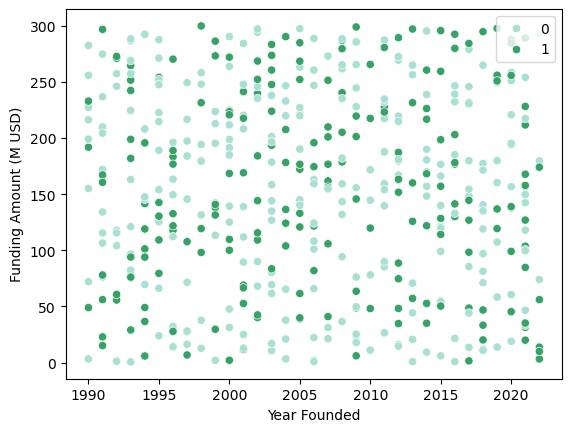

In [39]:
sns.scatterplot(x=df["Year Founded"], y=df["Funding Amount (M USD)"], data=df, hue="Profitable", palette="BuGn")
plt.legend(loc=1)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\2918849791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(b, palette="BuGn")


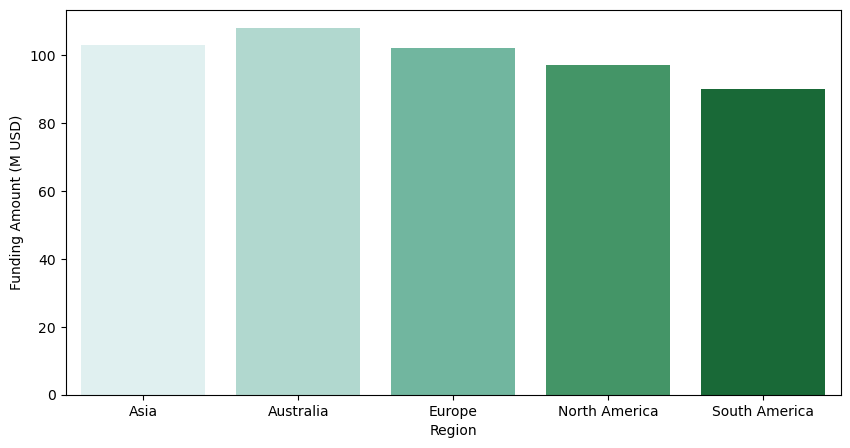

In [41]:
b= df.groupby("Region")["Funding Amount (M USD)"].count()
plt.figure(figsize=(10,5))
sns.barplot(b, palette="BuGn")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\2310974739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(c,palette="BuGn" )


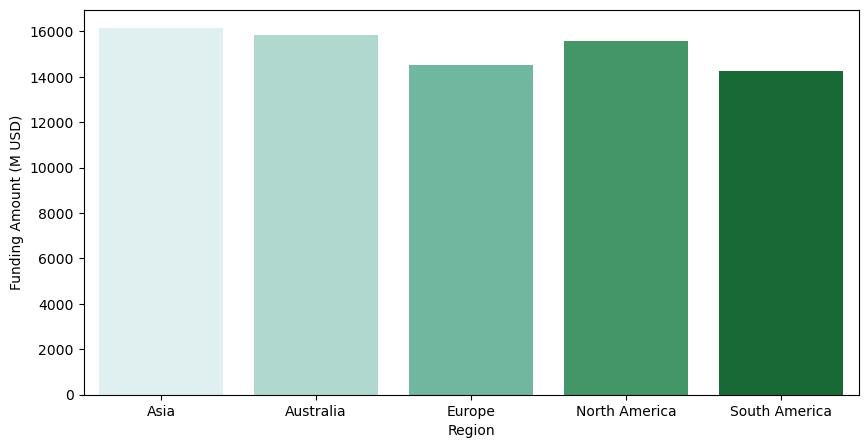

In [43]:
c = df.groupby("Region")["Funding Amount (M USD)"].sum()
plt.figure(figsize=(10,5))
sns.barplot(c,palette="BuGn" )
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\1792289868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d, palette="BuGn")


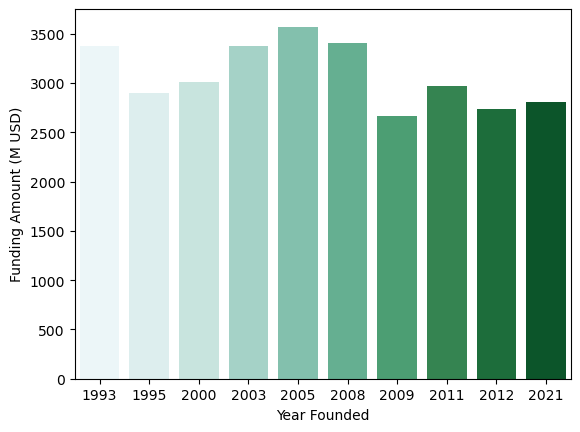

In [45]:
d = df.groupby("Year Founded")["Funding Amount (M USD)"].sum().sort_values(ascending=False).head(10)
sns.barplot(d, palette="BuGn")
plt.show()

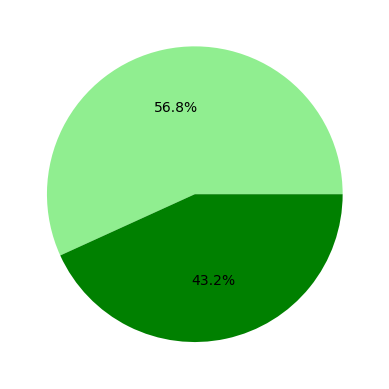

In [47]:
a = df.groupby("Profitable")["Market Share (%)"].count()
plt.pie(a, autopct="%1.1f%%", colors=["lightGreen", "Green"])
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\2760587295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d, palette="BuGn")


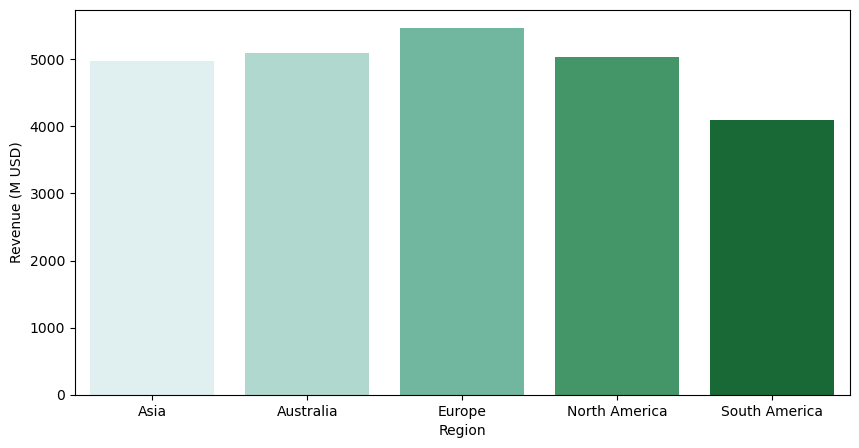

In [49]:
d = df.groupby("Region")["Revenue (M USD)"].sum()
plt.figure(figsize=(10,5))
sns.barplot(d, palette="BuGn")
plt.show()

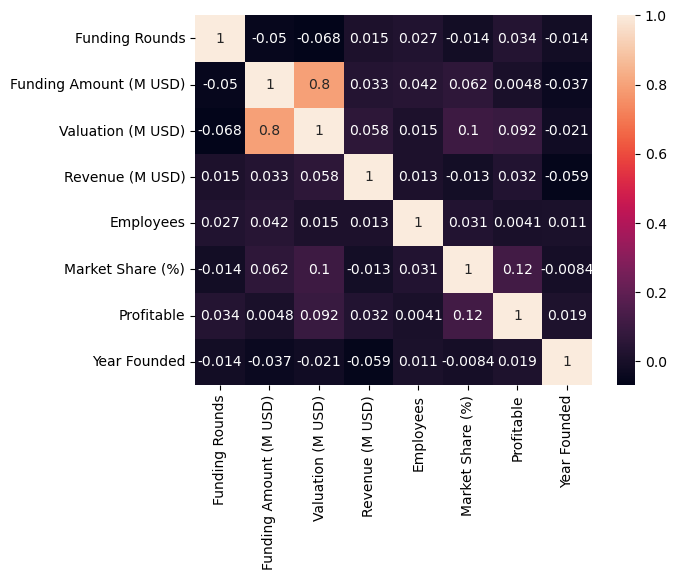

In [51]:
#Multvarient Graph
col = ["Funding Rounds","Funding Amount (M USD)","Valuation (M USD)","Revenue (M USD)","Employees","Market Share (%)","Profitable","Year Founded"]
corr = df[col].corr()
sns.heatmap(corr, annot=True)
plt.show()

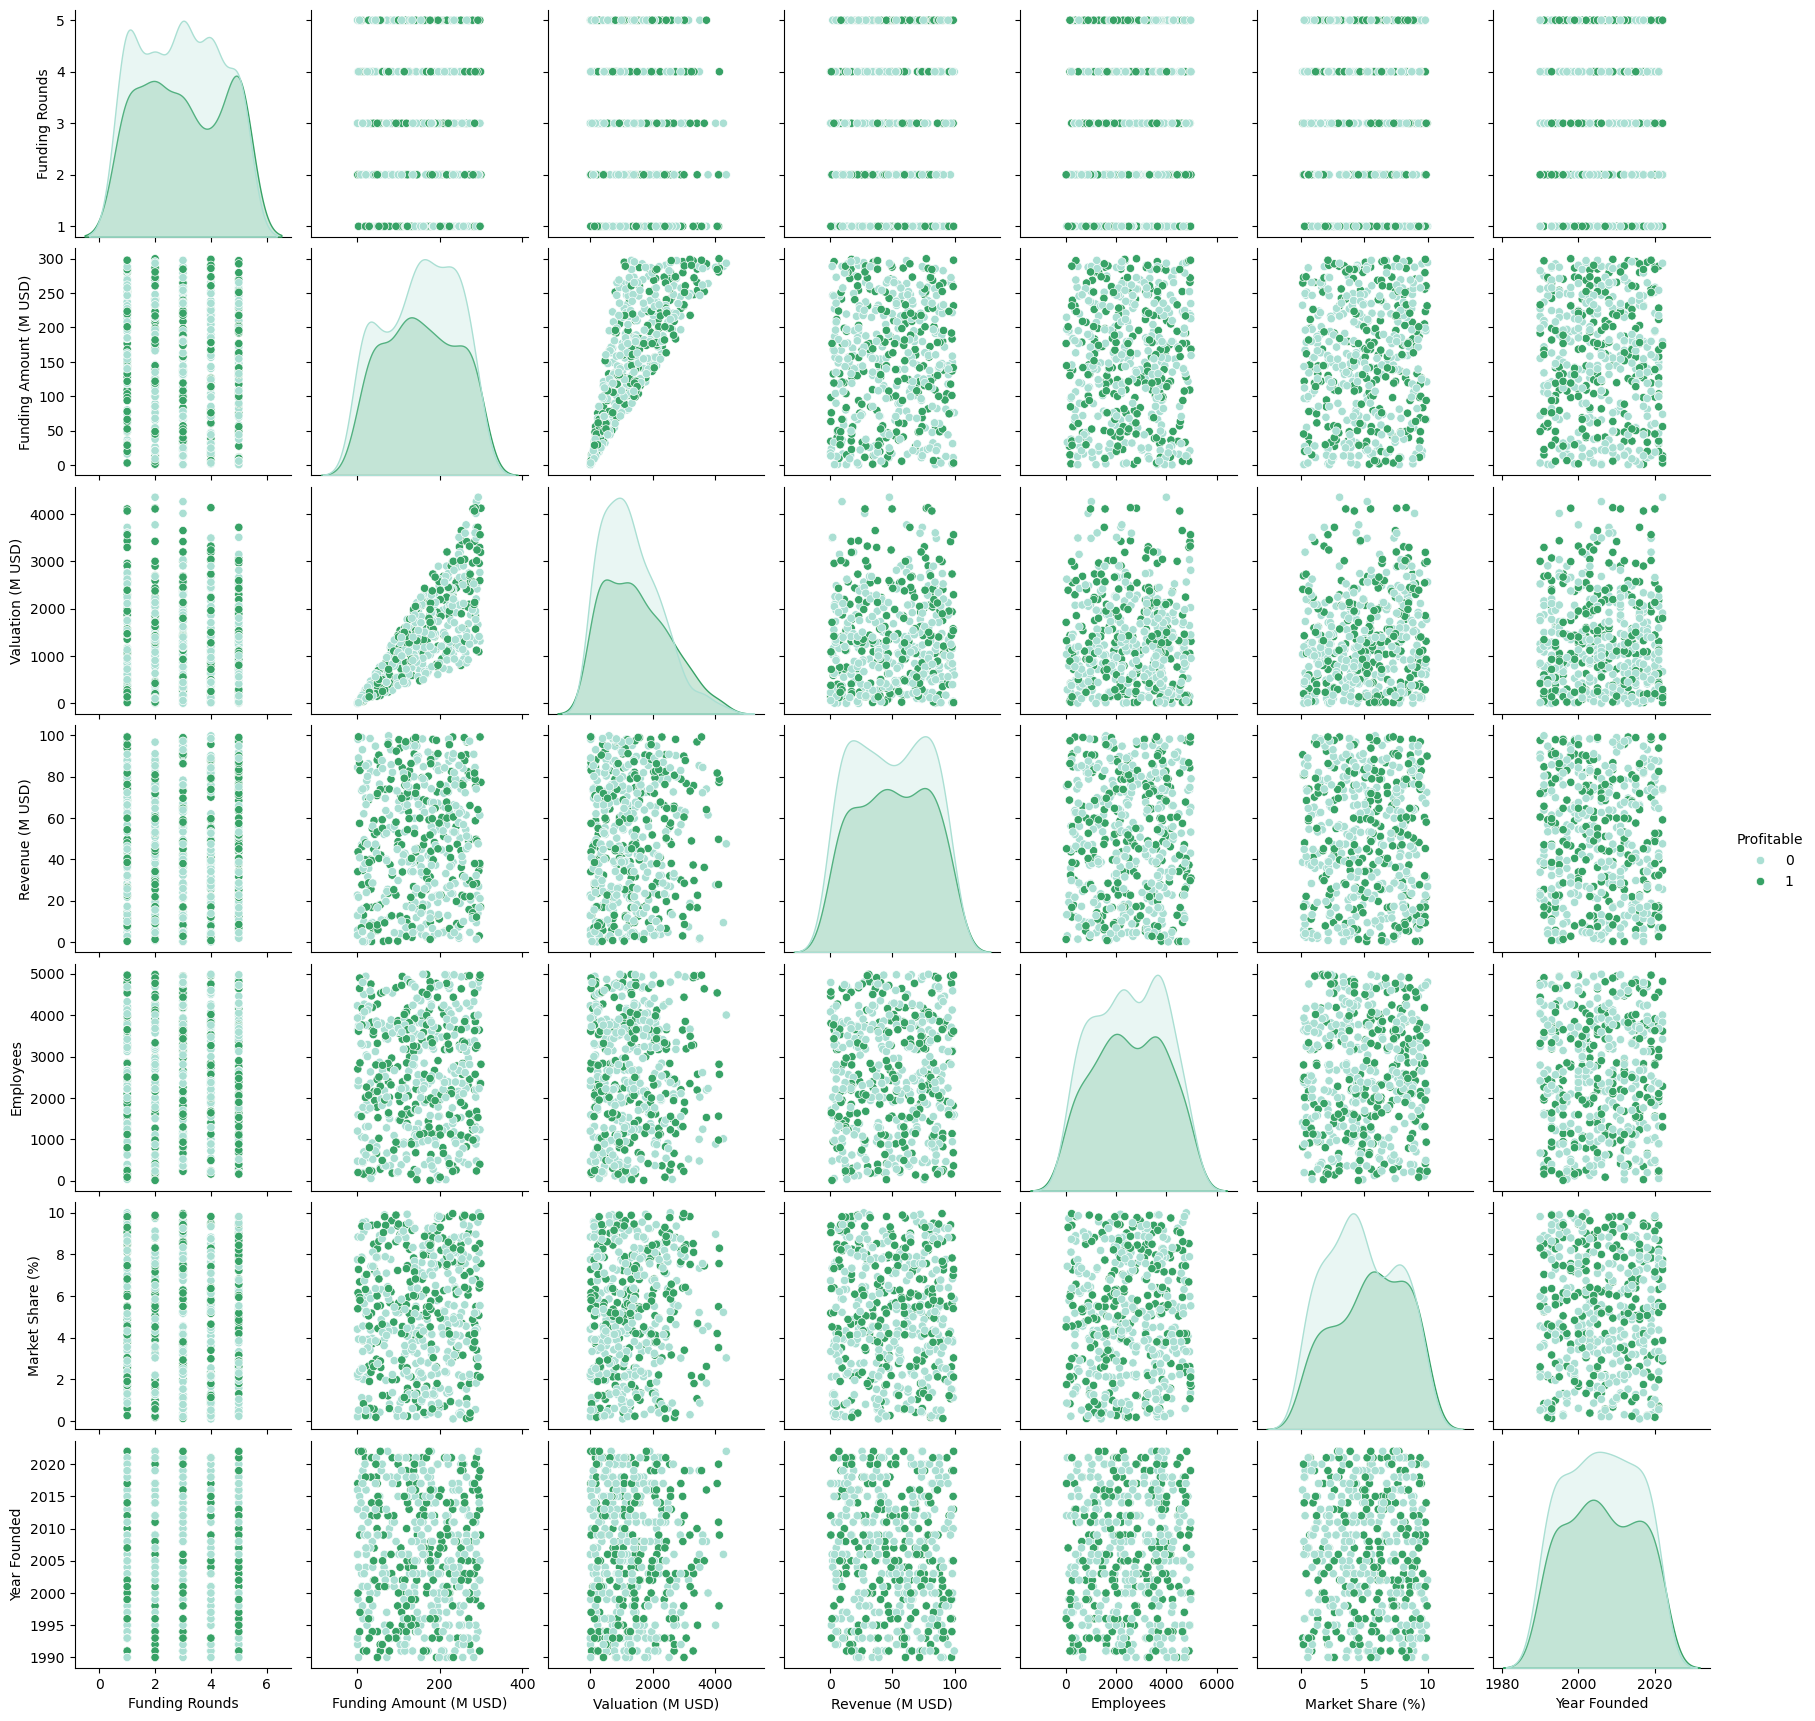

In [53]:
sns.pairplot(df, hue="Profitable", palette="BuGn")
plt.show()

In [55]:
#Drop column
df = df.drop(columns=['Startup Name'])

In [ ]:
#One Hot Encoding
df = pd.get_dummies(df, columns=['Industry', 'Region', 'Exit Status'], dtype="int")

In [137]:
from sklearn.preprocessing import StandardScaler

In [139]:
st = StandardScaler()

In [141]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [115]:
#Fitting the Logistic Regression training Data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [79]:
#Split data 
X = df.drop(["Profitable"], axis=1)
Y = df["Profitable"]

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [119]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(350, 23) (150, 23) (350,) (150,)


In [121]:
Y_test

361    1
73     1
374    0
155    0
104    0
      ..
266    0
23     0
222    1
261    0
426    0
Name: Profitable, Length: 150, dtype: int64

In [123]:
lr = LogisticRegression(solver='liblinear')

In [125]:
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [127]:
y_pred1 = lr.predict(X_test)

In [129]:
y_pred1

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [169]:
#Measuring the Accuracy
print(accuracy_score(y_pred1, Y_test))
print(classification_report(y_pred1, Y_test))
print(confusion_matrix(y_pred1, Y_test))

0.56
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       103
           1       0.35      0.47      0.40        47

    accuracy                           0.56       150
   macro avg       0.53      0.54      0.53       150
weighted avg       0.60      0.56      0.57       150

[[62 41]
 [25 22]]


In [171]:
accu1 = accuracy_score(y_pred1, Y_test)

In [133]:
#To Compare Test and Prediction Value
print("Y_test", Y_test)
print("Prediction", y_pred1)

Y_test 361    1
73     1
374    0
155    0
104    0
      ..
266    0
23     0
222    1
261    0
426    0
Name: Profitable, Length: 150, dtype: int64
Prediction [1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0]


In [143]:
#K Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier

In [145]:
lr = KNeighborsClassifier(n_neighbors=3)

In [147]:
lr.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [163]:
y_pred = lr.predict(X_test)

In [173]:
print(accuracy_score(y_pred, Y_test))

0.5266666666666666


In [175]:
accu2 = accuracy_score(y_pred, Y_test)

In [179]:
data = {"Model":["Logistic Regression", "KNN"],
       "Accuracy":[accu1, accu2]}

In [181]:
D = pd.DataFrame(data)
D

,Model,Accuracy
0,Logistic Regression,0.560000
1,KNN,0.526667


C:\Users\soniv\AppData\Local\Temp\ipykernel_19516\35249633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=D["Model"], y=D["Accuracy"], palette="BuGn")


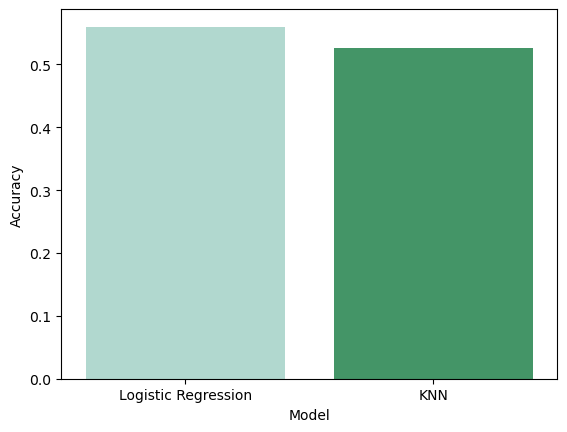

In [187]:
#Campare Model
sns.barplot(x=D["Model"], y=D["Accuracy"], palette="BuGn")
plt.show()